# Performance analysis across libraries

## Libraries and definitions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

FType = 'svg'

axessize=18
ticksize=14
legendsize=14

## Data loading and variable assignment

In [2]:
myxls = '2010_ExpressionAnalysisCompare.xlsx'
x1 = pd.ExcelFile(myxls)
mydf = x1.parse('RFClassComp')
Ori_Label = ['a','b','c','d','e','f','g']
Tst_Label = ['h','i','k']
mytst = 3

XName = '# Train'
Y1Name = 'f1 CrossV Mean'
Y2Name = 'f1 CrossV Std'
Y3Name = 'coefficient Var.'

TrainSet = mydf[XName][:-mytst].astype(float).values
f1Mean = mydf[Y1Name][:-mytst].astype(float).values
f1Std = mydf[Y2Name][:-mytst].astype(float).values
f1CV = mydf[Y3Name][:-mytst].astype(float).values

Tst_TrainSet = mydf[XName][-mytst:].astype(float).values
Tst_f1Mean = mydf[Y1Name][-mytst:].astype(float).values
Tst_f1Std = mydf[Y2Name][-mytst:].astype(float).values
Tst_f1CV = mydf[Y3Name][-mytst:].astype(float).values

XName = '# Features'
YName = 'Sum Top 3 FI'

FNum = mydf[XName][:-mytst].values
FImp = mydf[YName][:-mytst].values 
Tst_FNum = mydf[XName][-mytst:].values 
Tst_FImp = mydf[YName][-mytst:].values 



## Figure generation

### Subfigure A

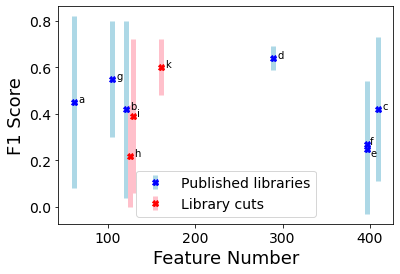

In [3]:
plt.rc('axes', labelsize=axessize) 
plt.rc('xtick', labelsize=ticksize) 
plt.rc('ytick', labelsize=ticksize) 
plt.rc('legend', fontsize=legendsize) 

# plt.scatter(Feat_Num, f1Mean, s=100, marker='X')
plt.errorbar(FNum, f1Mean, f1Std, fmt='X', color='b', ecolor='lightblue', elinewidth=5, capsize=0)
xshift = [5,5,5,5,3,3,5] # [5,5,-80,5,-120,-135,-66]
yshift = [0,0,0,0,-.03,0,0] # [0,-0.01,.01,0,-.0075,-.01,-.025]
for Indx,Source in enumerate(Ori_Label): # mydf.columns[1:-mytst]
    plt.text(FNum[Indx]+xshift[Indx], f1Mean[Indx]+yshift[Indx], Source)

# plt.scatter(TstF_Num, Tst_f1Mean, s=100, c='r', marker='x')
plt.errorbar(Tst_FNum, Tst_f1Mean, Tst_f1Std, fmt='X', color='r', ecolor='pink', elinewidth=5, capsize=0)
tstxshift = [5,5,5] # [5,5,-80]
tstyshift = [0,0,0] # [0,-0.01,.01]
for Indx,Source in enumerate(Tst_Label): #mydf.columns[-mytst:]
    plt.text(Tst_FNum[Indx]+tstxshift[Indx], Tst_f1Mean[Indx]+tstyshift[Indx], Source)

plt.xlabel('Feature Number')
plt.ylabel('F1 Score')
R2legend_orig = 'Published libraries'
R2legend_test = 'Library cuts'
plt.legend([R2legend_orig, R2legend_test], loc='lower center')

FigName = 'FeatNum-vs-F1Avg.{}'.format(FType)
# plt.savefig(FigName, bbox_inches='tight', format=FType)
# plt.show()

### Subfigure B

In [ ]:
# extracting feature number and importance
PCorr = np.corrcoef(FNum, FImp)[0,1]
m,n = np.polyfit(FNum, FImp, 1)

plt.rc('axes', labelsize=axessize) 
plt.rc('xtick', labelsize=ticksize) 
plt.rc('ytick', labelsize=ticksize) 
plt.rc('legend', fontsize=legendsize) 
X = np.linspace(np.min(FNum),np.max(FNum),100)

plt.plot(X, X*m+n, 'k:')
plt.scatter(FNum, FImp, s=100, marker='X')
# annotating scatter
xshift = [5,5,5,5,-15,-15,-15] # [5,5,-80,5,-120,-135,-66]
yshift = [0,0,.01,0,0,-.01,0] # [0,-0.01,.01,0,-.0075,-.01,-.025]
for Indx,Source in enumerate(Ori_Label): # mydf.columns[1:-mytst]
    plt.text(FNum[Indx]+xshift[Indx], FImp[Indx]+yshift[Indx], Source)

# adding sequence subsets
plt.scatter(Tst_FNum, Tst_FImp, s=100, c='r', marker='x')
tstxshift = [8,8,-15] # [5,5,-80]
tstyshift = [0,0,0] # [0,-0.01,.01]
for Indx,Source in enumerate(Tst_Label): #mydf.columns[-mytst:]
    plt.text(Tst_FNum[Indx]+tstxshift[Indx], Tst_FImp[Indx]+tstyshift[Indx], Source)

plt.xlabel('Feature Number')
plt.ylabel('Sum of Top 3 FI')
R2Legend = 'y={:.3f}x+{:.1f}, R$^2$={:.2f}'.format(m,n,PCorr)
# RegrForm = r'$\sum_{i=0}^\infty x_i$'
plt.legend([R2Legend])
plt.style.use('seaborn-paper')
FigName = 'Feature_Number-vs-Importance.{}'.format(FType)
plt.savefig(FigName, bbox_inches='tight', format=FType)

### Subfigure C

In [ ]:
plt.rc('axes', labelsize=axessize) 
plt.rc('xtick', labelsize=ticksize) 
plt.rc('ytick', labelsize=ticksize) 
plt.rc('legend', fontsize=legendsize) 

plt.scatter(TrainSet, f1CV, s=100, marker='X')
xshift = [-110,50,75,-110,50,50,50]
yshift = [-0.01,0,0,0,-.0075,0,-.025]
for Indx,Source in enumerate(Ori_Label):
    plt.text(TrainSet[Indx]+xshift[Indx], f1CV[Indx]+yshift[Indx], Source)

plt.scatter(Tst_TrainSet, Tst_f1CV, c='r', s=100, marker='x')
tstxshift = [-125,75,50]
tstyshift = [-0.01,-.01,0]
for Indx,Source in enumerate(Tst_Label):
    plt.text(Tst_TrainSet[Indx]+tstxshift[Indx], Tst_f1CV[Indx]+tstyshift[Indx], Source)

plt.xlabel('Training Samples')
plt.ylabel('F1 coefficient of variation')
R2legend_orig = 'Published libraries'
R2legend_test = 'Library cuts'
# RegrForm = r'$\sum_{i=0}^\infty x_i$'
# plt.legend([R2legend_orig, R2legend_test])
plt.style.use('seaborn-paper')
FigName = 'SampleTrain-vs-f1CV.{}'.format(FType)
plt.savefig(FigName, bbox_inches='tight', format=FType)

plt.show()


### Subfigure D

In [ ]:
XName = 'Avg Seq Dist'
AvSqDist = mydf[XName][:-mytst].astype(float).values
Tst_AvSqDist = mydf[XName][-mytst:].astype(float).values

plt.rc('axes', labelsize=axessize) 
plt.rc('xtick', labelsize=ticksize) 
plt.rc('ytick', labelsize=ticksize) 
plt.rc('legend', fontsize=legendsize) 

plt.scatter(AvSqDist, f1CV, s=100, marker='X')
xshift = [.01,.01,.01,.01,.01,.01,.01]
yshift = [0,0,0,0,0,0,0]
for Indx,Source in enumerate(Ori_Label):
    plt.text(AvSqDist[Indx]+xshift[Indx], f1CV[Indx]+yshift[Indx], Source)

plt.scatter(Tst_AvSqDist, Tst_f1CV, c='r', s=100, marker='x')
tstxshift = [.01,.01,.01]
tstyshift = [0,0,0]
for Indx,Source in enumerate(Tst_Label):
    plt.text(Tst_AvSqDist[Indx]+tstxshift[Indx], Tst_f1CV[Indx]+tstyshift[Indx], Source)

plt.xlabel('Sequence diversity')
plt.ylabel('F1 coefficient of variation')
R2legend_orig = 'Published libraries'
R2legend_test = 'Library cuts'
# RegrForm = r'$\sum_{i=0}^\infty x_i$'
# plt.legend([R2legend_orig, R2legend_test])
plt.style.use('seaborn-paper')
FigName = 'SeqDiv-vs-f1CV.{}'.format(FType)
plt.savefig(FigName, bbox_inches='tight', format=FType)

plt.show()
print('F1 CoV change d-k: {:.2f}%'.format(Tst_f1CV[2]/f1CV[3]*100))
print('SeqDist change d-k: {:.2f}%'.format(Tst_AvSqDist[2]/AvSqDist[3]*100))
print('SampSize change d-k: {:.2f}%'.format(Tst_TrainSet[2]/TrainSet[3]*100))

## Multivariate linear regression

In [4]:
import statsmodels.api as sm
X = np.transpose([TrainSet,FNum,AvSqDist])
Y = np.transpose([f1Mean,f1CV])
df = pd.DataFrame(np.hstack([X,Y]), columns=['TrainSet','Features','SeqDist','F1Mean','F1CoV'])
pd.plotting.scatter_matrix(df)

ModuleNotFoundError: No module named 'statsmodels'

In [5]:
from sklearn.linear_model import LinearRegression
OLS = sm.OLS(f1CV, X).fit()
OLS.summary()


NameError: name 'sm' is not defined

plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=14) 

plt.errorbar(Ori_Label, f1Mean, f1Std, fmt='o', color='b', ecolor='lightblue', elinewidth=5, capsize=0)
plt.errorbar(Tst_Label, Tst_f1Mean, Tst_f1Std, fmt='o', color='r', ecolor='pink', elinewidth=5, capsize=0)
plt.xlabel('Promoter library')
plt.ylabel('F1 avg and std with cross val.')
R2legend_orig = 'Published libraries'
R2legend_test = 'Library cuts'
plt.legend([R2legend_orig, R2legend_test])

FigName = 'Libr-vs-f1AvgStd.{}'.format(FType)
plt.savefig(FigName, bbox_inches='tight', format=FType)

plt.show()